<a href="https://colab.research.google.com/github/Hanyan-Wu/MachineLearningLab/blob/main/MLPRegressor_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ColabNotebooks/CLV.csv", index_col=0)
df

,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [4]:
X = df.drop(['Customer Lifetime Value'], axis=1)
y = df['Customer Lifetime Value']

In [5]:
X

,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [6]:
y

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: Customer Lifetime Value, Length: 9134, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 425)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
X_train.shape

(6393, 16)

In [12]:
X_test.shape

(2741, 16)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [13]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [14]:
clf = MLPRegressor()

params = {
    'hidden_layer_sizes': [(10,), (10,50,), (10,100,10,), (50,100,25,5,)],
    'activation': ['relu', 'tanh', 'logisitc']
}

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'tanh', 'logisitc'],
                         'hidden_layer_sizes': [(10,), (10, 50), (10, 100, 10),
                                                (50, 100, 25, 5)]})

In [17]:
print(f'Best parameters are: {grid.best_params_}.')
print(f'Best accuracy: {grid.best_score_}.')

Best parameters are: {'activation': 'relu', 'hidden_layer_sizes': (50, 100, 25, 5)}.
Best accuracy: 0.060134324801961035.


# 3.) Train a model with the optimal solution from GridSearch

In [18]:
# Train a model with best parameters
regressor = MLPRegressor(**grid.best_params_)
regressor.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(50, 100, 25, 5))

# 4.) What are the in-sample and out of sample MSEs

In [19]:
y_pred_in = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Calculate in-sample and out-of-sample MSEs
MSE_in = mean_squared_error(y_train, y_pred_in)
MSE_out = mean_squared_error(y_test, y_pred)

print(f'The in-sample MSE is {MSE_in}.')
print(f'The out-of-sample MSE is {MSE_out}.')

The in-sample MSE is 39405083.08879398.
The out-of-sample MSE is 49694733.60541594.


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [22]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [23]:
# Create Architecture
model = Sequential()
model.add(Dense(grid.best_params_['hidden_layer_sizes'][0], activation=grid.best_params_['activation'], input_dim=X_train.shape[1]))

for i in range(1, len(grid.best_params_['hidden_layer_sizes'])):
    model.add(Dense(grid.best_params_['hidden_layer_sizes'][i], activation=grid.best_params_['activation']))

model.add(Dense(1, activation='softmax'))

In [24]:
# Train the model
model.compile(loss='mse', optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 106300728.0000
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 106300768.0000
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 106300728.0000
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 106300784.0000
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 106300816.0000
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 106300728.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 106300752.0000
Epoch 8/100
200/200 [==============================] - 1s 3ms/step - loss: 106300752.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 106300752.0000
Epoch 10/100
200/200 [==============================] - 1s 3ms/step - loss: 106300768.0000
Epoch 11/100
200/200 [==============================] - 1s 4ms/step - loss: 106300784.0000
Epoch 12

In [25]:
# Save the model
keras.models.save_model(model, '/content/gdrive/MyDrive/ColabNotebooks/KerasModel')

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [26]:
from tensorflow.keras.utils import plot_model

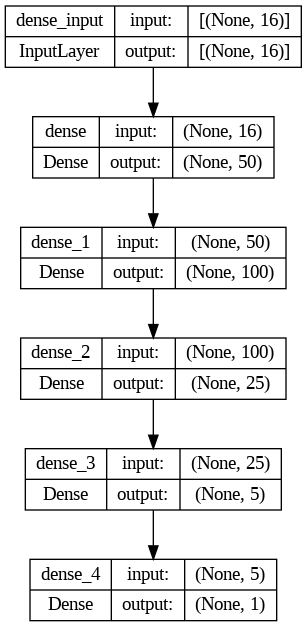

In [27]:
# Visulize using plot_model
plot_model(model, show_shapes = True)

In [28]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from ann_visualizer.visualize import ann_viz

In [30]:
# Visualize using Ann Visualizer
ann_viz(model, title = 'CLV NN Viz', filename = '/content/gdrive/MyDrive/ColabNotebooks/KerasModel/nn_model.gz')

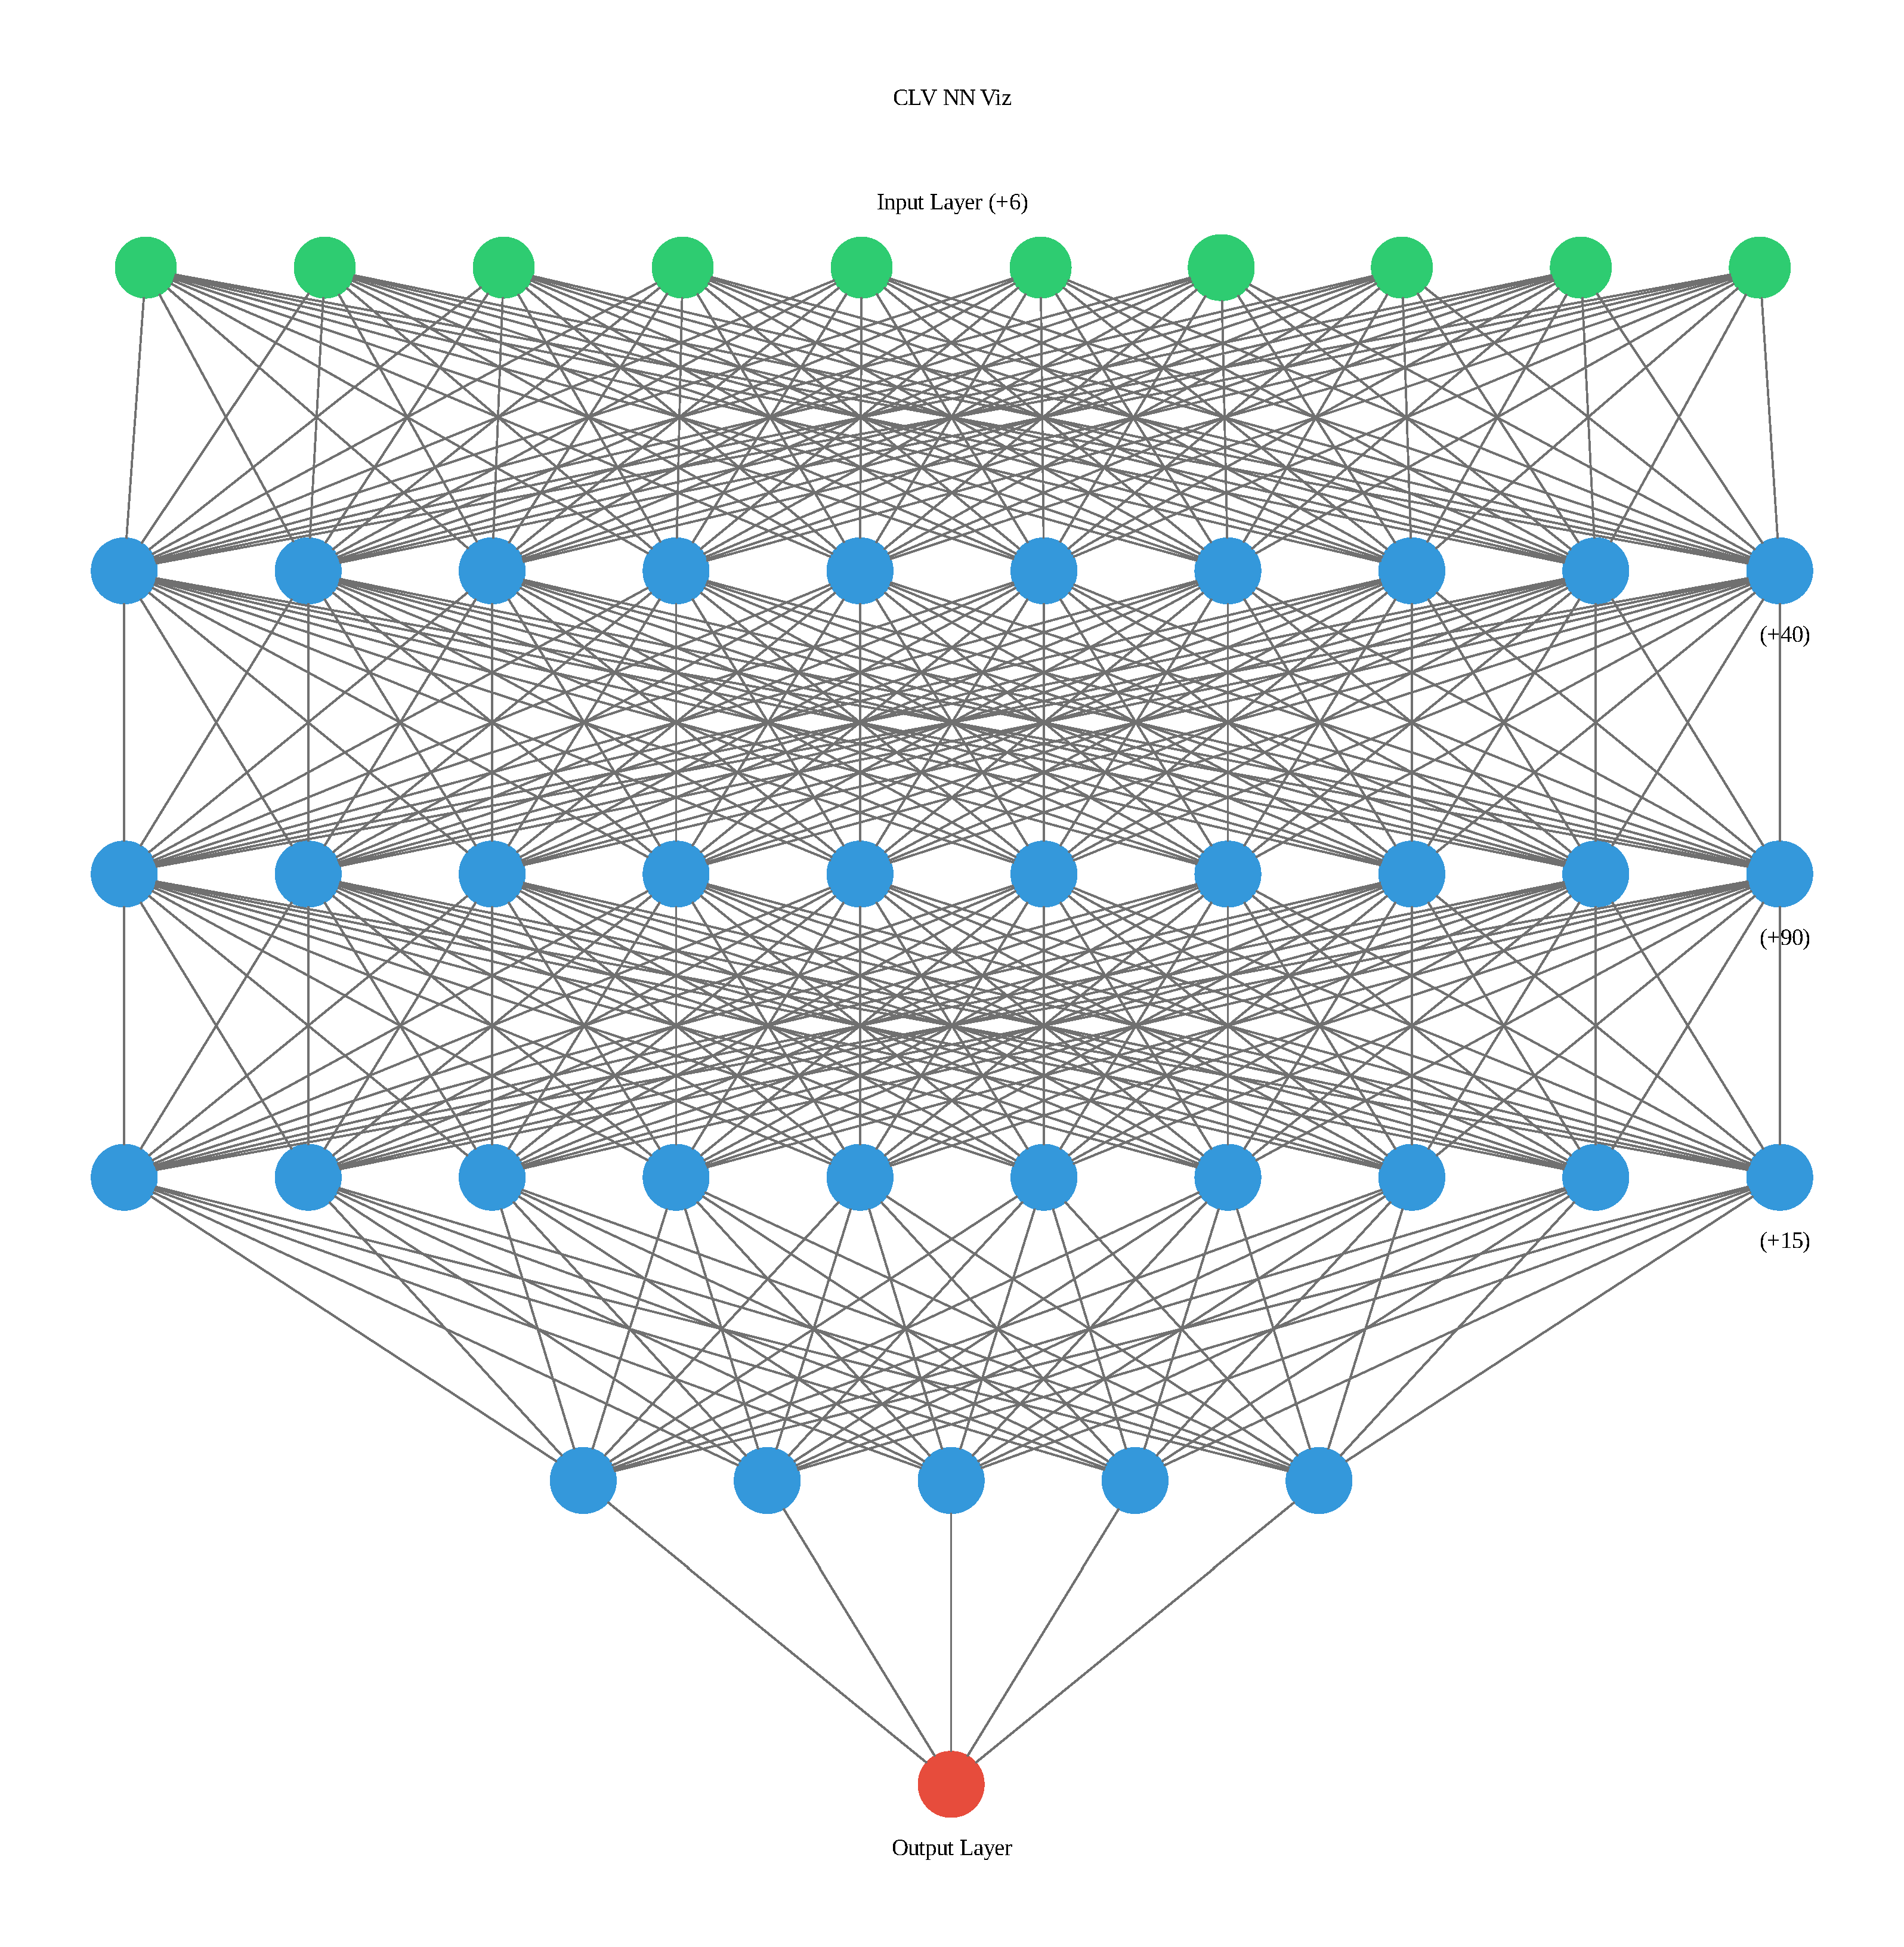

In [31]:
from IPython.display import Image

Image("/content/gdrive/MyDrive/ColabNotebooks/KerasModel/nn_model.gz.png")